In [1]:
import random, os, math
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import numpy as np
import pandas as pd

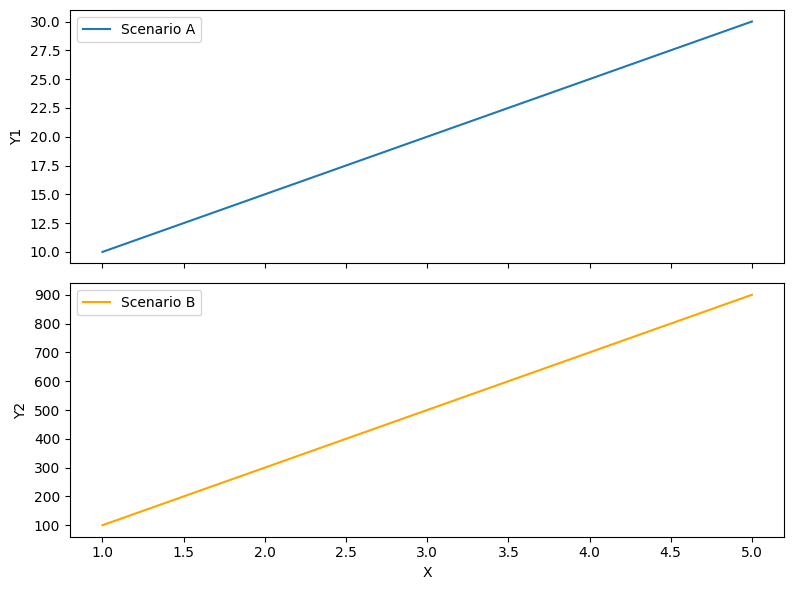

In [2]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y1 = [10, 15, 20, 25, 30]
y2 = [100, 300, 500, 700, 900]

fig, axs = plt.subplots(2, 1, sharex=True, figsize=(8, 6))

axs[0].plot(x, y1, label='Scenario A')
axs[0].set_ylabel('Y1')
axs[0].legend()

axs[1].plot(x, y2, label='Scenario B', color='orange')
axs[1].set_ylabel('Y2')
axs[1].set_xlabel('X')
axs[1].legend()

plt.tight_layout()
plt.show()

MH: 0, MP: 50:
- {0.0: '61354.68', 0.0001: '62349.35', 0.001: '61947.39', 0.01: '54252.26', 0.1: '52054.07', 0.5: '50678.83', 1.0: '51000.48'}
MH: 50, MP: 50:
- {0.0: '54157.96', 0.0001: '46084.99', 0.001: '43752.53', 0.01: '35745.28', 0.1: '34452.33', 0.5: '34948.45', 1.0: '40354.57'}
MH: 100, MP: 50:
- {0.0: '38272.65', 0.0001: '40019.18', 0.001: '39651.08', 0.01: '35246.96', 0.1: '33143.97', 0.5: '30805.10', 1.0: '33921.52'}


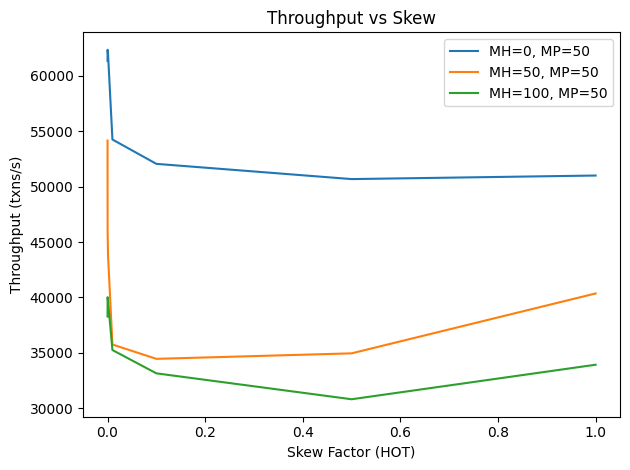

In [ ]:
# Define the MH and MP values
mhs = [0, 50, 100]
mps = [50]

# Plot throughput vs skew
for mh in mhs:
    for mp in mps:
        print(f"MH: {mh}, MP: {mp}:")
        base_dir = f"../../data/pps/skew/trial-mh_{mh}-mp_{mp}-1/Detock"
        throughput = defaultdict(int)
        for experiment in os.listdir(base_dir):
            skew = float(experiment.split("-")[-1])
            for client in os.listdir(f"{base_dir}/{experiment}/client"):
                if os.path.isdir(f"{base_dir}/{experiment}/client/{client}"):
                    metadata = pd.read_csv(f"{base_dir}/{experiment}/client/{client}/metadata.csv")
                    summary = pd.read_csv(f"{base_dir}/{experiment}/client/{client}/summary.csv")

                    duration = metadata["duration"].sum()
                    throughput[skew] += summary["committed"].sum() / duration
        throughput = dict(sorted(throughput.items()))
        print("-", {skew: f"{v:.2f}" for skew, v in throughput.items()})
        plt.plot(list(throughput.keys()), list(throughput.values()), label=f"MH={mh}, MP={mp}")
plt.title("Throughput vs Skew")
plt.xlabel("Skew Factor (HOT)")
plt.ylabel("Throughput (txns/s)")
plt.legend()
plt.tight_layout()
plt.show()

Throughput for trial-1 per Skew:
- {0.0: '49326.78', 0.0001: '51107.18', 0.001: '53217.08', 0.01: '50184.87', 0.1: '51863.11', 0.5: '50196.28', 1.0: '52785.82'}
Throughput for trial-2 per Skew:
- {0.0: '63434.73', 0.0001: '63613.13', 0.001: '64368.70', 0.01: '60654.16', 0.1: '59471.17', 0.5: '59917.19', 1.0: '56758.51'}
Throughput for trial-3 per Skew:
- {0.0: '40327.03', 0.0001: '41178.66', 0.001: '44279.32', 0.01: '44794.78', 0.1: '40920.25', 0.5: '37691.97', 1.0: '40536.19'}
Throughput for trial-mh_0-mp_50-1 per Skew:
- {0.0: '61354.68', 0.0001: '62349.35', 0.001: '61947.39', 0.01: '54252.26', 0.1: '52054.07', 0.5: '50678.83', 1.0: '51000.48'}
Throughput for trial-mh_50-mp_50-1 per Skew:
- {0.0: '54157.96', 0.0001: '46084.99', 0.001: '43752.53', 0.01: '35745.28', 0.1: '34452.33', 0.5: '34948.45', 1.0: '40354.57'}
Throughput for trial-mh_100-mp_50-1 per Skew:
- {0.0: '38272.65', 0.0001: '40019.18', 0.001: '39651.08', 0.01: '35246.96', 0.1: '33143.97', 0.5: '30805.10', 1.0: '33921.52'

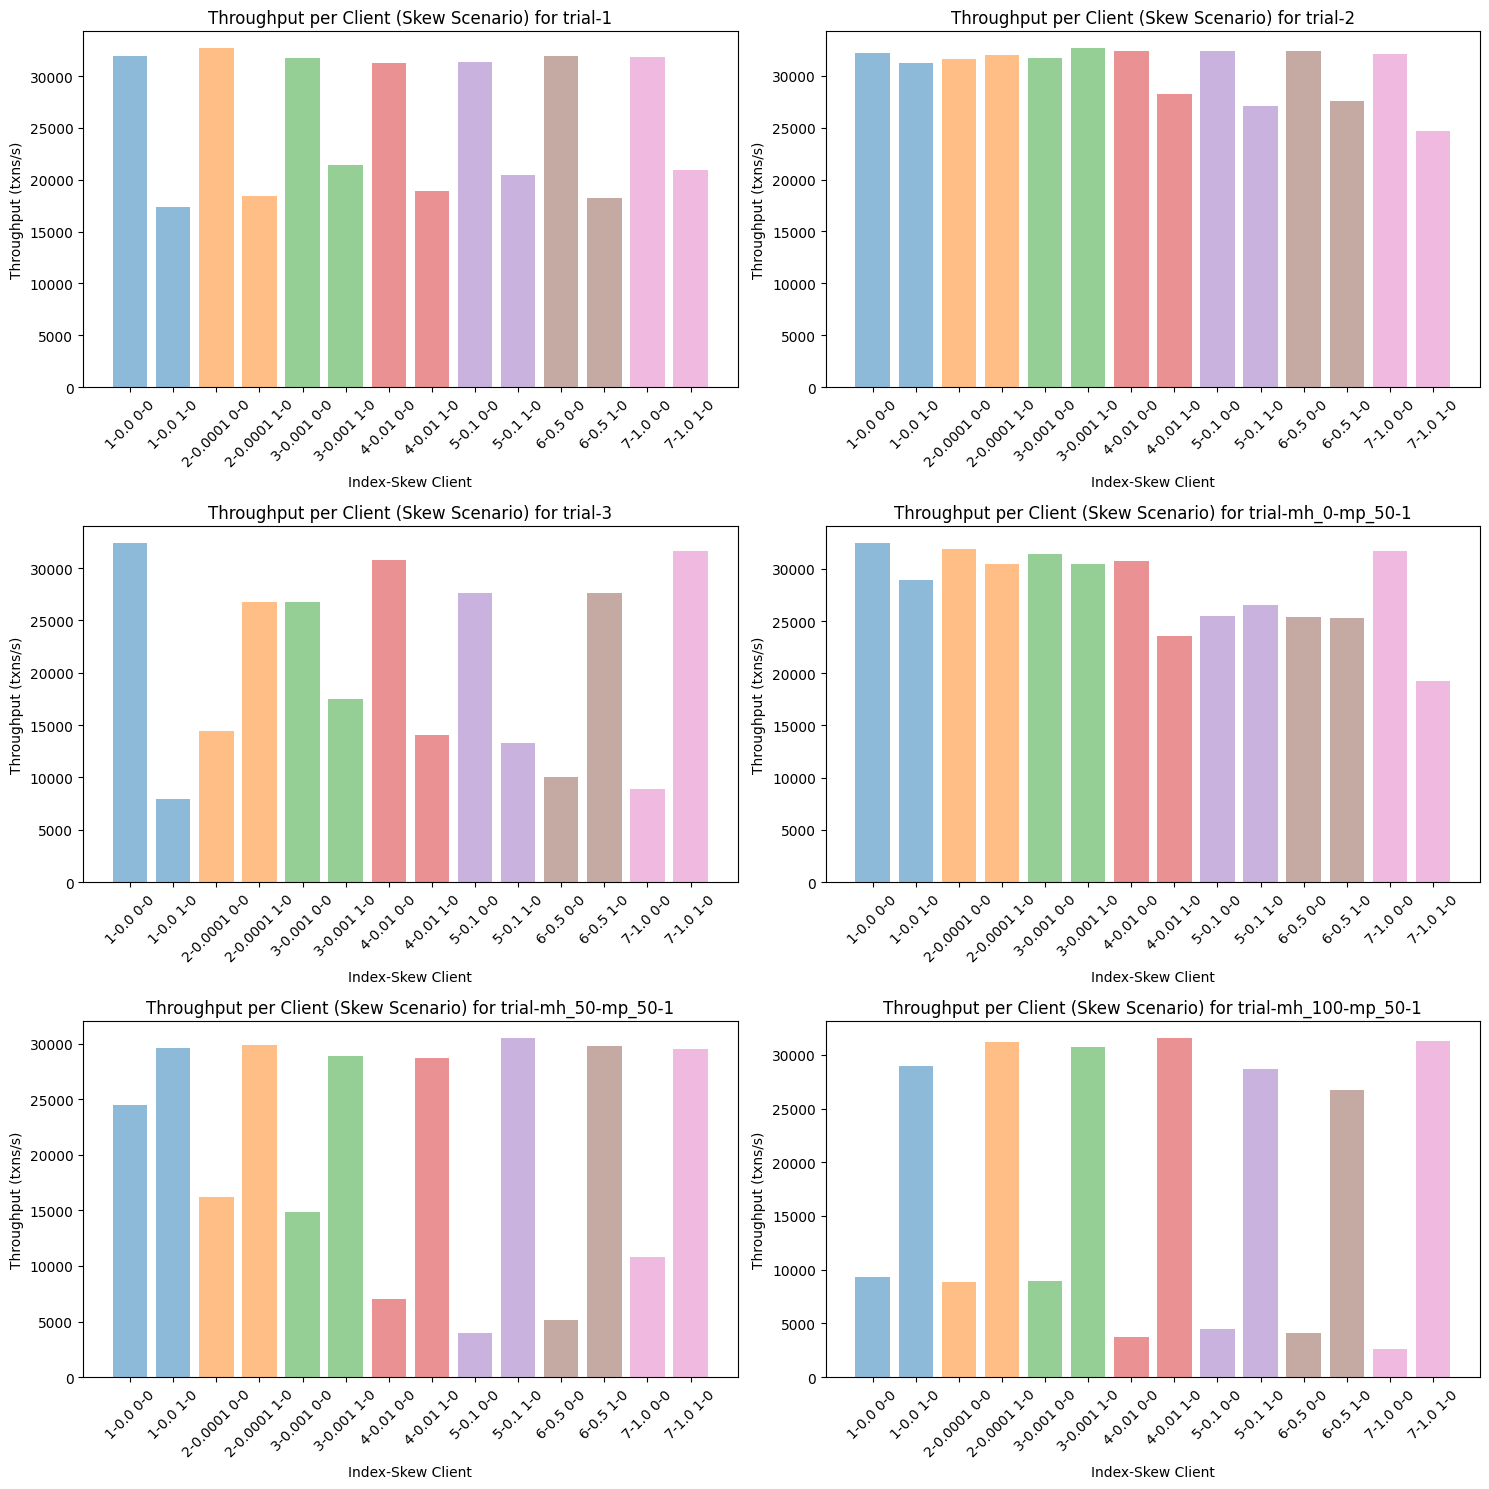

In [38]:
# Skew Scenario Throughput Analysis

# Variables that need to be set
trial_tags = ["trial-1", "trial-2", "trial-3", "trial-mh_0-mp_50-1", "trial-mh_50-mp_50-1", "trial-mh_100-mp_50-1"]
cols = 2
rows = int(np.ceil(len(trial_tags) / cols))

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  

for i, trial_tag in enumerate(trial_tags):
    # Collect throughput data
    skews = defaultdict(dict)
    base_dir = f"../../data/pps/skew/{trial_tag}/Detock"
    for experiment in os.listdir(base_dir):
        skew = float(experiment.split("-")[-1])
        index = int(experiment.split("-")[0])
        current = {}
        for client in os.listdir(f"{base_dir}/{experiment}/client"):
            if os.path.isdir(f"{base_dir}/{experiment}/client/{client}"):
                metadata = pd.read_csv(f"{base_dir}/{experiment}/client/{client}/metadata.csv")
                summary = pd.read_csv(f"{base_dir}/{experiment}/client/{client}/summary.csv")

                duration = metadata["duration"].sum()
                throughput = summary["committed"].sum() / duration
                current[client] = throughput
        skews[skew][index] = current

    # Plot the throughput for each experiment per client
    for skew in sorted(skews.keys()):
        for index in sorted(skews[skew].keys()):
            current = skews[skew][index]
            axes[i].bar([f"{index}-{skew} {client}" for client in current.keys()], current.values(), alpha=0.5)
    axes[i].set_title(f"Throughput per Client (Skew Scenario) for {trial_tag}")
    axes[i].set_xlabel("Index-Skew Client")
    axes[i].set_ylabel("Throughput (txns/s)")
    axes[i].tick_params(axis='x', rotation=45)

    # Print the total average throughput for each skew
    print(f"Throughput for {trial_tag} per Skew:")
    throughput = {}
    for skew in sorted(skews.keys()):
        total = 0
        for index in sorted(skews[skew].keys()):
            current = skews[skew][index]
            total += sum(current.values())
        throughput[skew] = total / len(skews[skew])
    print("-", {skew: f"{v:.2f}" for skew, v in throughput.items()})
plt.tight_layout()
plt.show()

In [39]:
# Skew Scenario Involved Regions and Partitions Analysis

# Variables that need to be set
trial_tags = ["trial-mh_100-mp_50-1"]
samples = 10000

for i, trial_tag in enumerate(trial_tags):
    # Collecting involved regions and partitions data
    print(f"Processing {trial_tag}...")
    base_dir = f"../../data/pps/skew/{trial_tag}/Detock"
    involved_regions = defaultdict(dict)
    involved_partitions = defaultdict(dict)
    for experiment in os.listdir(base_dir):
        skew = float(experiment.split("-")[-1])
        index = int(experiment.split("-")[0])
        involved_regions[skew][index] = {}
        involved_partitions[skew][index] = {}
        for client in os.listdir(f"{base_dir}/{experiment}/client"):
            if os.path.isdir(f"{base_dir}/{experiment}/client/{client}"):
                transactions = pd.read_csv(f"{base_dir}/{experiment}/client/{client}/transactions.csv")
                involved_regions[skew][index][client] = dict(Counter([x for x in transactions["regions"][:samples].values \
                                                 if not isinstance(x, float) or not math.isnan(x)]))
                involved_partitions[skew][index][client] = dict(Counter([x for x in transactions["partitions"][:samples].values \
                                                    if not isinstance(x, float) or not math.isnan(x)]))
    
    # Print the involved regions and partitions for each skew
    for skew in sorted(involved_regions.keys()):
        print(f"- Results for Skew {skew}")
        for index in sorted(involved_regions[skew].keys()):
            current = involved_regions[skew][index]
            print(f"-- {index} Reg:", 
                  {client: {regions: f"{current[client][regions]} ({int(current[client][regions] / sum(current[client].values()) * 100)}%)" \
                    for regions in sorted(current[client])} for client in current})
            # current = involved_partitions[skew][index]
            # print(f"--- Partitions:", 
            #       {client: {partitions: f"{current[client][partitions]} ({int(current[client][partitions] / sum(current[client].values()) * 100)}%)" \
            #         for partitions in current[client]} for client in current})

Processing trial-mh_100-mp_50-1...
- Results for Skew 0.0
-- 1 Reg: {'0-0': {'0': '3482 (34%)', '0;1': '3071 (30%)', '1': '3417 (34%)'}, '1-0': {'0': '3497 (35%)', '0;1': '3000 (30%)', '1': '3432 (34%)'}}
- Results for Skew 0.0001
-- 2 Reg: {'0-0': {'0': '3456 (34%)', '0;1': '3009 (30%)', '1': '3488 (35%)'}, '1-0': {'0': '3523 (35%)', '0;1': '2975 (30%)', '1': '3418 (34%)'}}
- Results for Skew 0.001
-- 3 Reg: {'0-0': {'0': '3484 (34%)', '0;1': '2990 (30%)', '1': '3484 (34%)'}, '1-0': {'0': '3380 (34%)', '0;1': '3058 (30%)', '1': '3487 (35%)'}}
- Results for Skew 0.01
-- 4 Reg: {'0-0': {'0': '3412 (34%)', '0;1': '2962 (30%)', '1': '3475 (35%)'}, '1-0': {'0': '3523 (35%)', '0;1': '2975 (29%)', '1': '3450 (34%)'}}
- Results for Skew 0.1
-- 5 Reg: {'0-0': {'0': '3446 (34%)', '0;1': '2930 (29%)', '1': '3510 (35%)'}, '1-0': {'0': '3482 (34%)', '0;1': '2905 (29%)', '1': '3562 (35%)'}}
- Results for Skew 0.5
-- 6 Reg: {'0-0': {'0': '3479 (35%)', '0;1': '2946 (29%)', '1': '3460 (35%)'}, '1-0': 

In [41]:
# Skew Scenario Record Access Analysis

# Variables that need to be set
trial_tag = "trial-mh_100-mp_50-1"
samples = 10000

base_dir = f"../../data/pps/skew/{trial_tag}/Detock"
experiments = os.listdir(base_dir)
experiments = sorted(experiments, key=lambda x: float(x.split("-")[-1]))

record_access = {}
for i, experiment in enumerate(experiments):
    print(f"Processing {experiment}...")
    # Collecting transaction codes
    codes = {}
    for client in os.listdir(f"{base_dir}/{experiment}/client"):
        if os.path.isdir(f"{base_dir}/{experiment}/client/{client}"):
            transactions = pd.read_csv(f"{base_dir}/{experiment}/client/{client}/transactions.csv")
            codes[client] = transactions["code"].tolist()[:samples]

    # Collecting product access data for get_parts_by_product
    gpbp_type = {}
    for client in codes.keys():
        gpbp_type[client] = []
        for code in codes[client]:
            type = code.split(";")[0]
            if type == "get_parts_by_product":
                gpbp_type[client].append(int(code.split(";")[1]))
    record_access[experiment] = gpbp_type

Processing 1-0...
Processing 2-0.0001...
Processing 3-0.001...
Processing 4-0.01...
Processing 5-0.1...
Processing 6-0.5...
Processing 7-1.0...


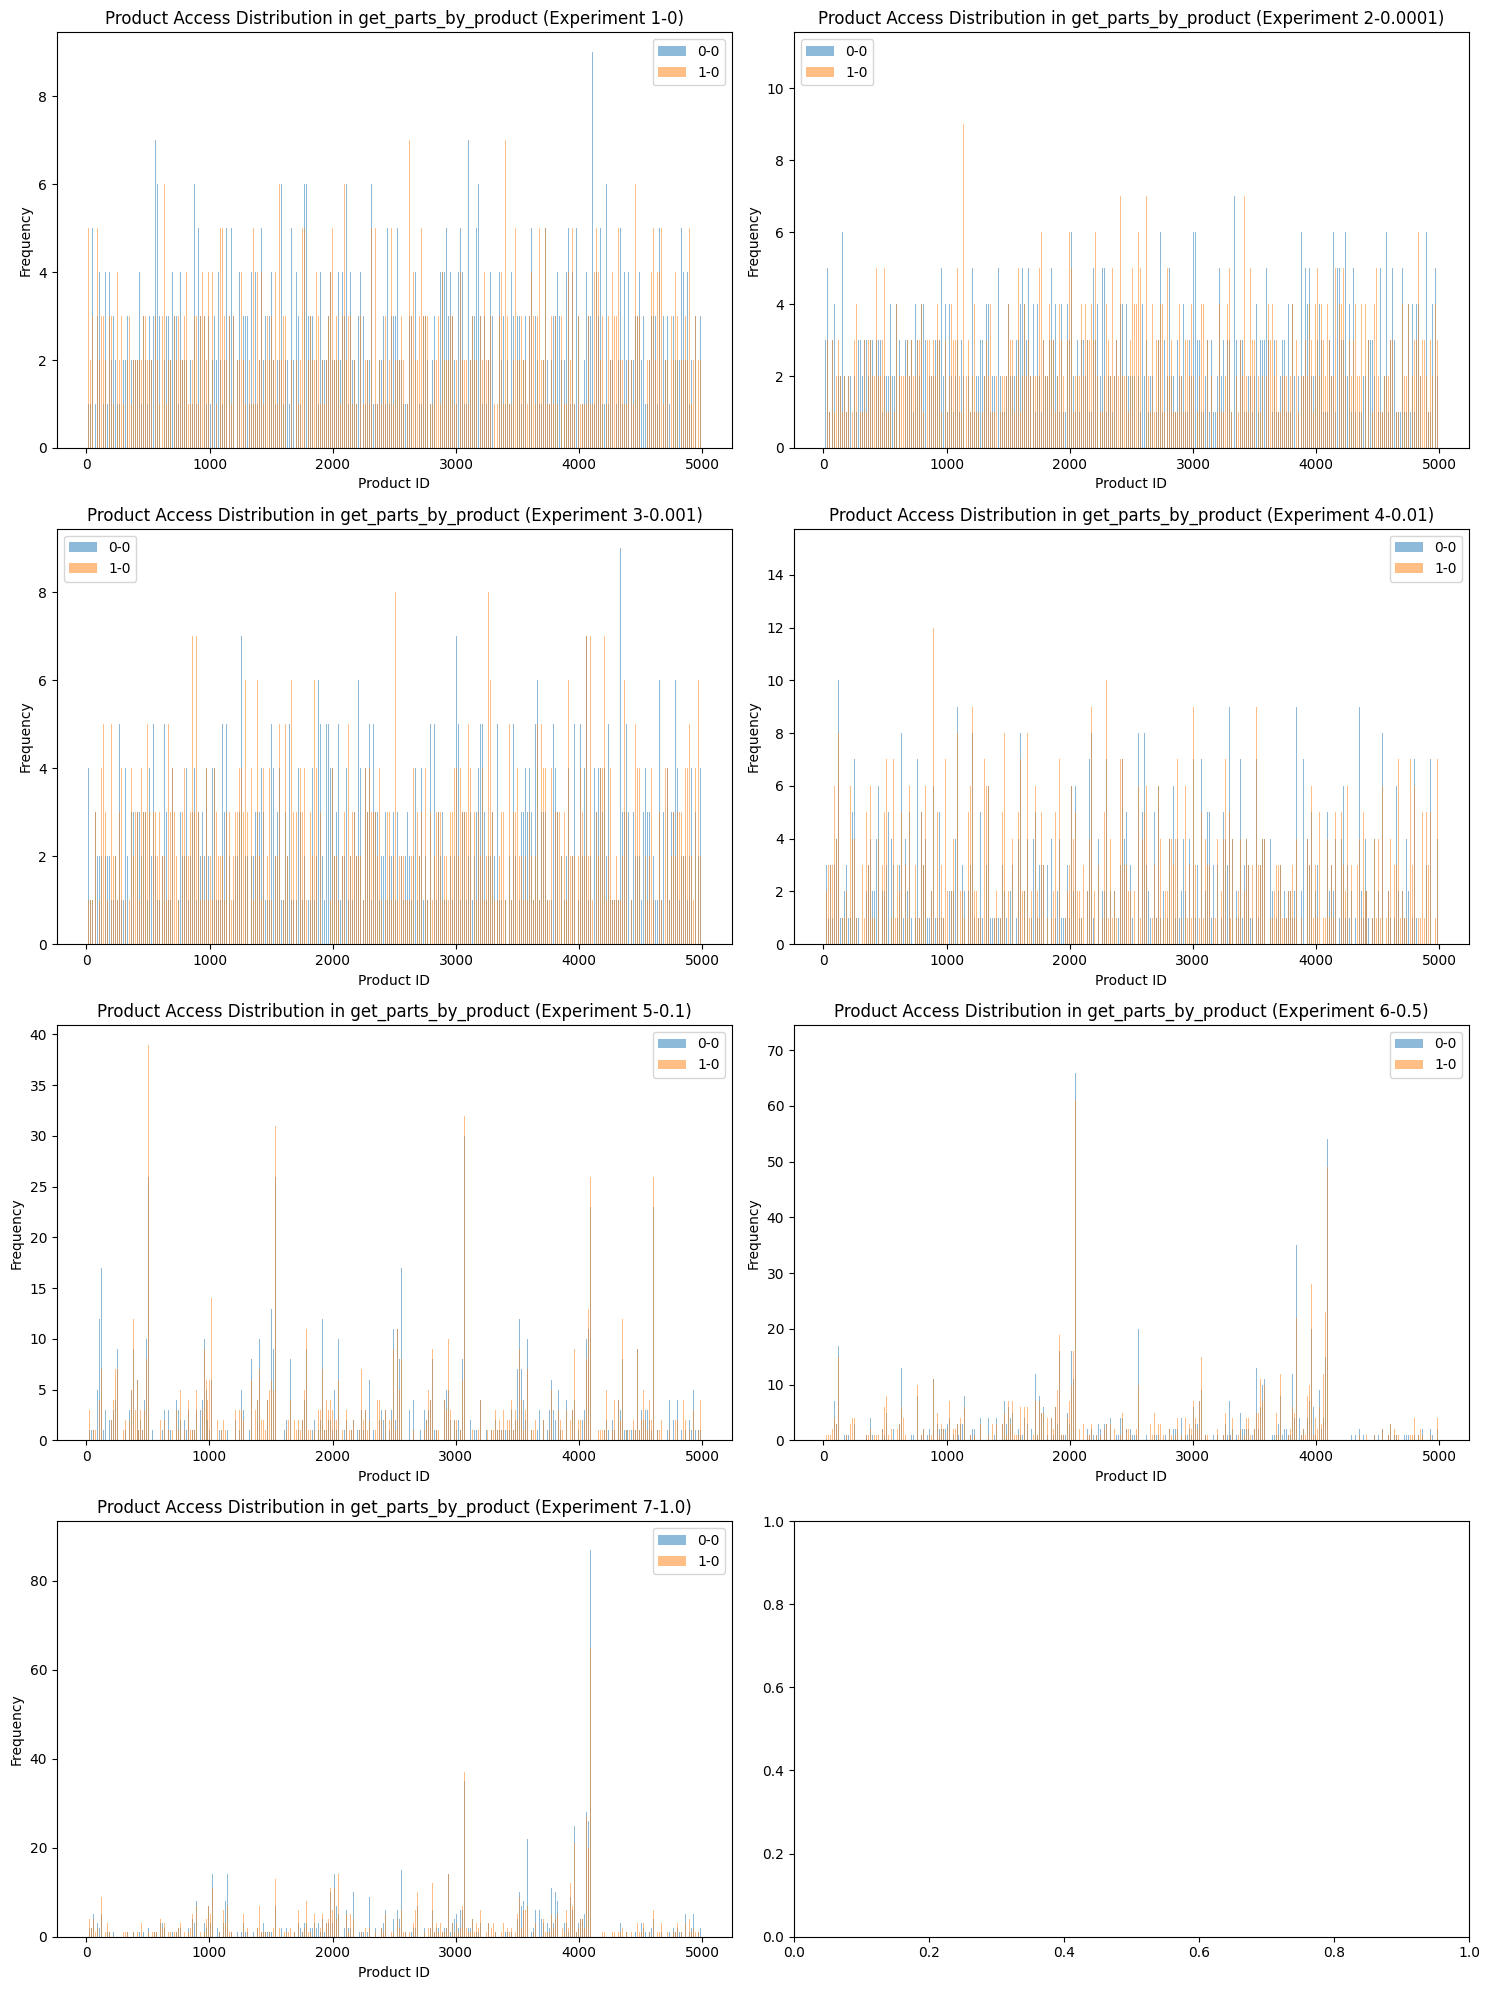

In [42]:
# Variables that need to be set
cols = 2

rows = int(np.ceil(len(experiments) / cols))
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  

# Plot the product access distribution for each experiment for get_parts_by_product
for i, experiment in enumerate(experiments):
    gpbp_type = record_access[experiment]
    for j, client in enumerate(gpbp_type.keys()):
        mn = min(gpbp_type[client])
        mx = max(gpbp_type[client])
        axes[i].hist(gpbp_type[client], bins=range(mn, mx + 1), alpha=0.5, label=client)
    axes[i].set_title(f"Product Access Distribution in get_parts_by_product (Experiment {experiment})")
    axes[i].set_xlabel("Product ID")
    axes[i].set_ylabel("Frequency")
    axes[i].legend()
plt.tight_layout()
plt.show()

In [43]:
# Print the most accessed products
for experiment in experiments:
    gpbp_type = record_access[experiment]
    print(f"Most accessed products for {experiment}:")
    counters = {}
    for client in gpbp_type.keys():
        counter = Counter(gpbp_type[client])
        counters[client] = counter
        most_common = counter.most_common(25)
        print(f"- {client}: {most_common}")
    intersection = set(gpbp_type[list(gpbp_type.keys())[0]])
    for client in gpbp_type.keys():
        intersection = intersection.intersection(set(gpbp_type[client]))
    print(f"- Intersection:", {product: [counters[client][product] for client in gpbp_type.keys()] for product in intersection})

Most accessed products for 1-0:
- 0-0: [(3807, 9), (4108, 9), (2299, 8), (672, 8), (3738, 7), (3900, 7), (1613, 7), (713, 7), (2144, 7), (4383, 7), (2458, 7), (3101, 7), (41, 7), (3833, 7), (1886, 7), (1935, 7), (4265, 7), (395, 7), (1487, 7), (2000, 7), (560, 7), (3182, 6), (2957, 6), (816, 6), (1257, 6)]
- 1-0: [(1133, 9), (1116, 8), (1882, 8), (2639, 8), (3837, 7), (1995, 7), (2172, 7), (480, 7), (1309, 7), (4653, 7), (829, 7), (2622, 7), (2191, 7), (2848, 7), (3007, 7), (2413, 7), (3757, 7), (639, 7), (3402, 7), (1597, 7), (4605, 7), (1530, 7), (4795, 7), (302, 7), (4190, 7)]
- Intersection: {10: [4, 1], 11: [3, 2], 12: [4, 3], 13: [1, 1], 14: [3, 3], 15: [2, 4], 16: [1, 5], 25: [3, 3], 26: [5, 2], 27: [4, 1], 28: [3, 3], 29: [2, 6], 30: [1, 1], 32: [1, 2], 41: [7, 2], 42: [1, 4], 43: [3, 4], 45: [2, 3], 46: [1, 1], 47: [2, 3], 48: [5, 3], 57: [1, 1], 61: [4, 4], 63: [2, 2], 64: [4, 2], 74: [6, 3], 76: [5, 1], 77: [2, 3], 79: [3, 4], 80: [3, 1], 89: [3, 5], 90: [2, 1], 92: [2, 5], 